In [6]:
## 기본 패키지 로딩 
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [7]:
## 한글사용을 설정 
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15,4)
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
## 데이터 읽어들이기 
df = pd.read_csv('data/4) 9월 개질기 운전 밴더_sample.csv', encoding = 'cp949')
print(df.shape)
df.head()

(41659, 160)


,바인딩시간,장비번호,장비날짜,장비시간,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,W_Desulfur,W_CO,W_Backflow,W_P301_F_Cnt,S_Level_Con,S_Desulfur,S_CO,S_Backflow,S_P301_F_Cnt,S_P203OL
0,20190901010002,10965,2019-09-01,0.040498,0,2,723,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,False
1,20190901010103,10965,2019-09-01,0.041204,0,2,724,59.3,4990,109.9,...,False,False,False,False,False,False,False,False,False,False
2,20190901010204,10965,2019-09-01,0.041910,0,2,724,59.3,4990,110.0,...,False,False,False,False,False,False,False,False,False,False
3,20190901010305,10965,2019-09-01,0.042627,0,2,723,59.3,4990,110.1,...,False,False,False,False,False,False,False,False,False,False
4,20190901010401,10965,2019-09-01,0.043275,0,2,724,59.3,4990,109.8,...,False,False,False,False,False,False,False,False,False,False


In [28]:
'''
#파일이 여러개일 경우는 아래와 같이 할 수 도 있다. 
df_09 = pd.read_csv('data/4) 9월 개질기 운전 밴더_sample.csv', encoding = 'cp949')
df_10 = pd.read_csv('data/4) 10월 개질기 운전 밴더_sample.csv', encoding = 'cp949')
df_11 = pd.read_csv('data/4) 11월 개질기 운전 밴더_sample.csv', encoding = 'cp949')
df = pd.concat(df_09, df_10,df_11)
'''

"\ndf_09 = pd.read_csv('data/4) 9월 개질기 운전 밴더_sample.csv', encoding = 'cp949')\ndf_10 = pd.read_csv('data/4) 10월 개질기 운전 밴더_sample.csv', encoding = 'cp949')\ndf_11 = pd.read_csv('data/4) 11월 개질기 운전 밴더_sample.csv', encoding = 'cp949')\ndf = pd.concat(df_09, df_10,df_11)\n"

In [9]:
## 장비시간 컬럼을 H:M:S 포맷으로 바꿔줘야 한다. 
import datetime 

for i in range(df['장비시간'].count()):
    df['장비시간'][i] = str(datetime.timedelta(df['장비시간'][i])) 
    
df['장비시간'].head(10)

0    0:58:19
1    0:59:20
2    1:00:21
3    1:01:23
4    1:02:19
5    1:03:20
6    1:04:21
7    1:05:22
8    1:06:18
9    1:07:20
Name: 장비시간, dtype: object

In [13]:
## 장비날짜와 장비시간을 합쳐서 새로운 컬럼 equit_dt를 만들자 
df['equip_dt'] = df['장비날짜'] + ' ' + df['장비시간']
df['equip_dt'] = pd.to_datetime(df['equip_dt'])
df['equip_dt'].head()

0   2019-09-01 00:58:19
1   2019-09-01 00:59:20
2   2019-09-01 01:00:21
3   2019-09-01 01:01:23
4   2019-09-01 01:02:19
Name: equip_dt, dtype: datetime64[ns]

In [14]:
## 분석 편의를 위해 equip_dt를 분해한다. 
df['year'] = df['equip_dt'].dt.year
df['month'] = df['equip_dt'].dt.month
df['day'] = df['equip_dt'].dt.day
df['hour'] = df['equip_dt'].dt.hour
df['minute'] = df['equip_dt'].dt.minute
df['second'] = df['equip_dt'].dt.second

df.tail()

,바인딩시간,장비번호,장비날짜,장비시간,Pattern,Load,ACP,TT Cogen,Seq,TT117,...,S_Backflow,S_P301_F_Cnt,S_P203OL,equip_dt,year,month,day,hour,minute,second
41654,20190930225504,10965,2019-09-30,22:53:10,0,2,744,57.4,4990,110.2,...,False,False,False,2019-09-30 22:53:10,2019,9,30,22,53,10
41655,20190930225605,10965,2019-09-30,22:54:11,0,2,743,57.5,4990,110.0,...,False,False,False,2019-09-30 22:54:11,2019,9,30,22,54,11
41656,20190930225701,10965,2019-09-30,22:55:07,0,2,743,57.4,4990,110.2,...,False,False,False,2019-09-30 22:55:07,2019,9,30,22,55,7
41657,20190930225802,10965,2019-09-30,22:56:08,0,2,743,57.5,4990,110.0,...,False,False,False,2019-09-30 22:56:08,2019,9,30,22,56,8
41658,20190930225904,10965,2019-09-30,22:57:09,0,2,743,57.5,4990,110.1,...,False,False,False,2019-09-30 22:57:09,2019,9,30,22,57,9


In [51]:
### 1. 분석대상 변수를 지정한다. (리스트 직접 입력 방식)
var_list_1 = ['ACP', 'TT102', 'TT120', 'TT109', 'TT112']
var_list_1

['ACP', 'TT102', 'TT120', 'TT109', 'TT112']

In [54]:
### 5개 센서들의 통계량 한꺼번에 구하기 
print( df[var_list_1].mean() )
print( df[var_list_1].min() )
print( df[var_list_1].max() )

ACP      694.073141
TT102    629.807101
TT120    729.661146
TT109    183.991334
TT112    140.724492
dtype: float64
ACP        0.0
TT102    202.7
TT120    201.9
TT109    130.8
TT112     86.5
dtype: float64
ACP      837.0
TT102    684.1
TT120    826.9
TT109    275.9
TT112    224.5
dtype: float64


In [55]:
df[var_list_1].describe()

,ACP,TT102,TT120,TT109,TT112
count,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000
mean,694.073141,629.807101,729.661146,183.991334,140.724492
std,172.813120,76.466178,94.731942,12.758184,12.233329
min,0.000000,202.700000,201.900000,130.800000,86.500000
25%,732.000000,645.600000,747.300000,180.000000,140.000000
50%,738.000000,646.400000,750.800000,180.200000,140.100000
75%,742.000000,647.400000,753.100000,184.600000,140.200000
max,837.000000,684.100000,826.900000,275.900000,224.500000


In [57]:
## 2. 분석 대상 변수를 파일로 부터 불러오기. 
var_list_2 = pd.read_csv('data/charting_list.csv')
var_list_2 = var_list_2['var']
var_list_2

0       TT117
1       TT102
2       TT109
3       TT112
4       TT123
5       TT120
6       TT101
7     P101_MF
8     P102_SP
9         ACP
10      TT301
11      TT302
12     PIT101
13     PIT201
14    P201_MF
15    P202_MF
16    P203_MF
17    P301_SP
18    P303_SP
19    P304_SP
20    Conduct
Name: var, dtype: object

In [59]:
## 21개 변수들의 통계량 구하기 
df[var_list_2].describe()

,TT117,TT102,TT109,TT112,TT123,TT120,TT101,P101_MF,P102_SP,ACP,...,TT302,PIT101,PIT201,P201_MF,P202_MF,P203_MF,P301_SP,P303_SP,P304_SP,Conduct
count,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,...,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,41659.000000,41659.0
mean,118.131688,629.807101,183.991334,140.724492,86.282465,729.661146,112.709715,3.060073,0.152936,694.073141,...,63.439946,14.725458,17.571892,17.333383,0.705887,46.021034,8.656246,80.882241,74.588240,0.0
std,28.160959,76.466178,12.758184,12.233329,6.204615,94.731942,5.589800,0.747700,0.133123,172.813120,...,3.806552,2.868521,2.535627,2.094568,0.173388,11.332628,1.555117,24.884751,28.635311,0.0
min,100.300000,202.700000,130.800000,86.500000,51.500000,201.900000,97.000000,0.000000,0.000000,0.000000,...,38.500000,0.600000,7.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,109.900000,645.600000,180.000000,140.000000,86.300000,747.300000,112.000000,3.210000,0.143300,732.000000,...,63.100000,14.870000,17.550000,17.010000,0.740000,48.430000,9.000000,64.880000,54.880000,0.0
50%,110.100000,646.400000,180.200000,140.100000,87.200000,750.800000,112.400000,3.240000,0.143300,738.000000,...,64.300000,15.330000,18.080000,17.440000,0.750000,48.820000,9.000000,96.080000,86.080000,0.0
75%,111.600000,647.400000,184.600000,140.200000,88.500000,753.100000,112.800000,3.270000,0.172000,742.000000,...,65.200000,15.830000,18.610000,17.850000,0.760000,49.150000,9.000000,100.000000,100.000000,0.0
max,277.800000,684.100000,275.900000,224.500000,94.000000,826.900000,186.300000,5.000000,1.450000,837.000000,...,67.200000,18.720000,24.940000,29.260000,1.000000,60.410000,11.000000,100.000000,100.000000,0.0


In [61]:
## 통계량을 csv 파일로 내보내기 
df_stat = pd.DataFrame(df[var_list_2].describe())
df_stat.to_csv('output/stat_Sep_2020.csv')

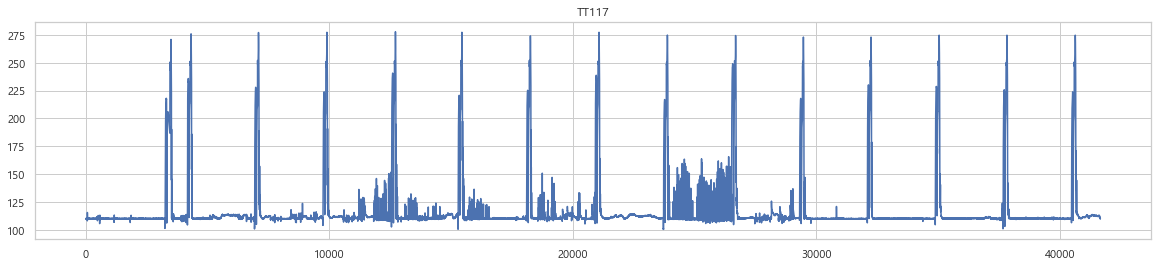

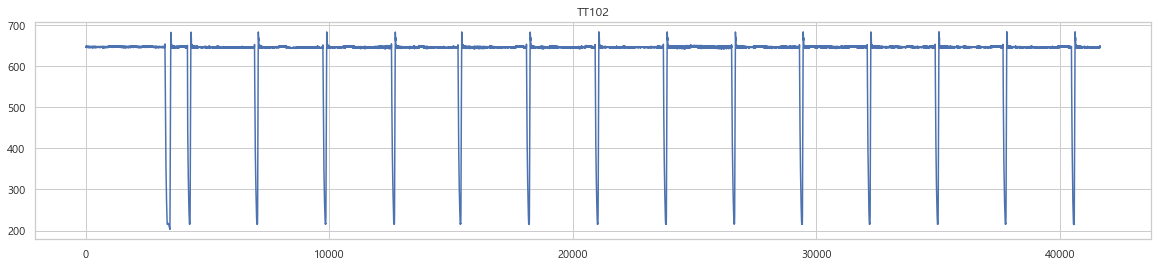

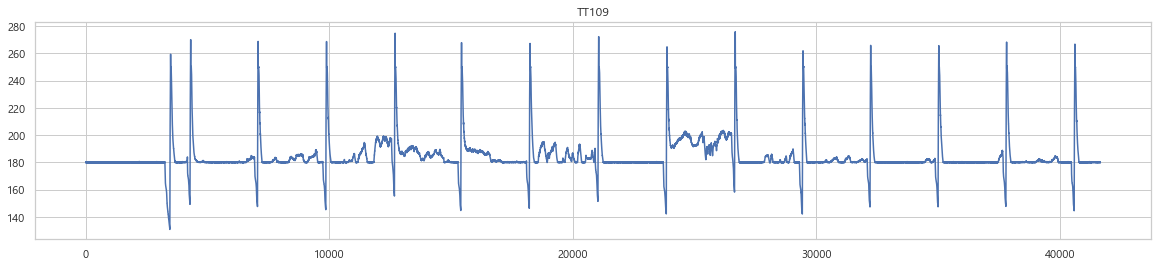

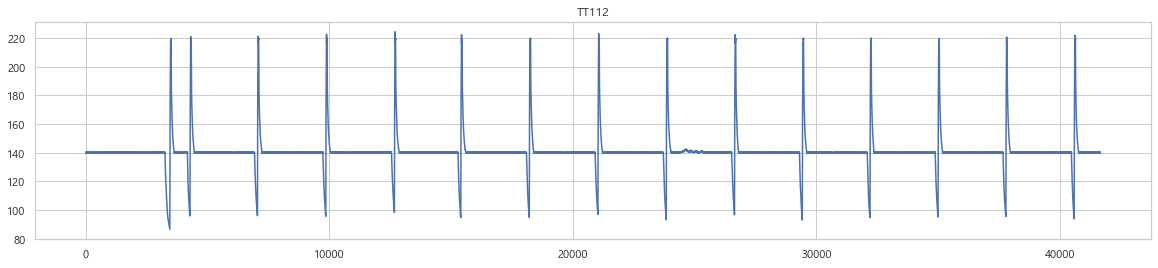

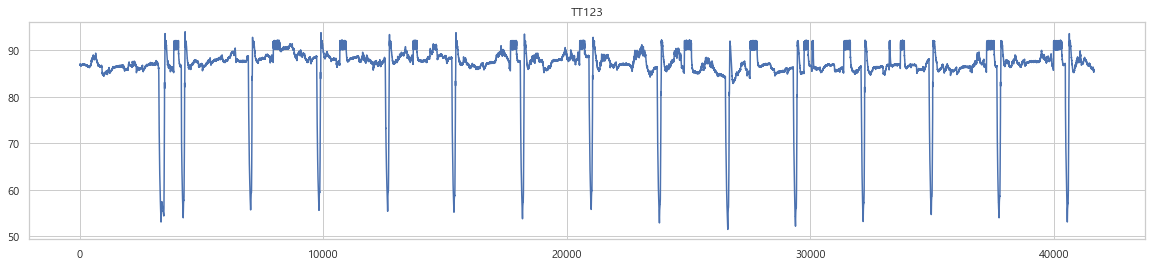

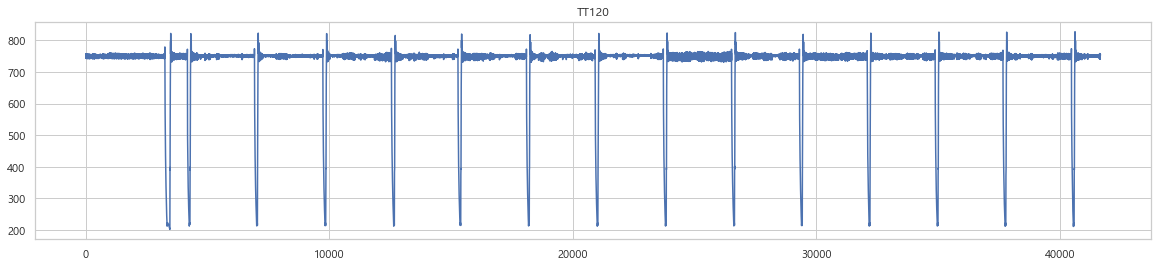

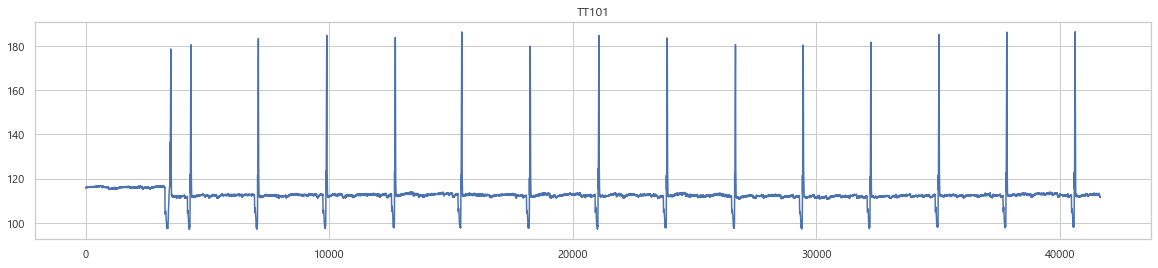

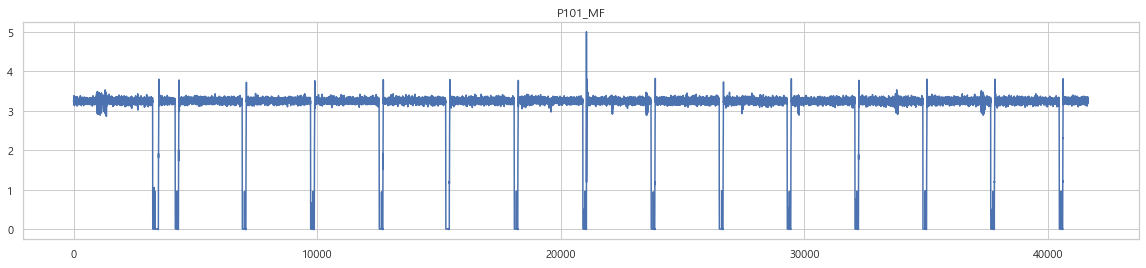

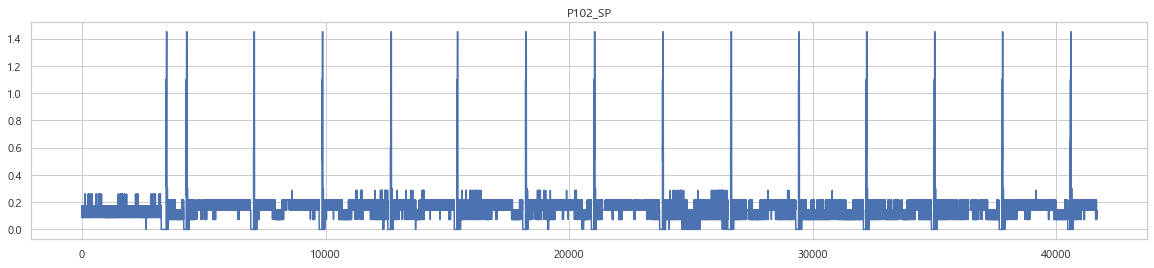

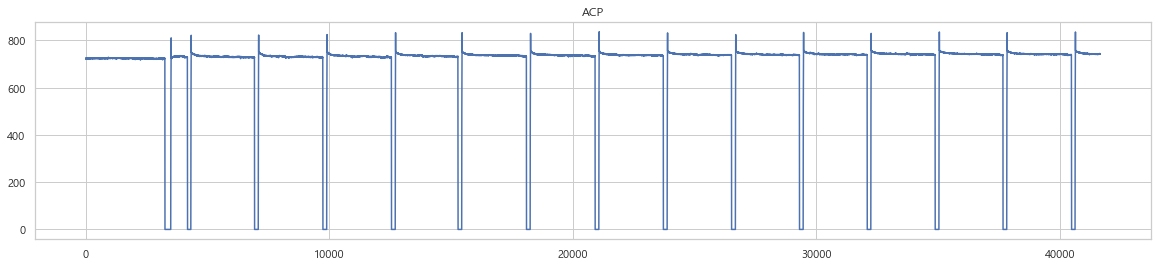

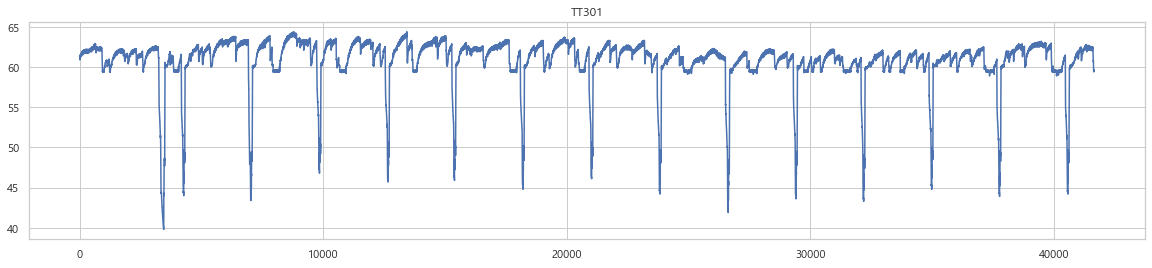

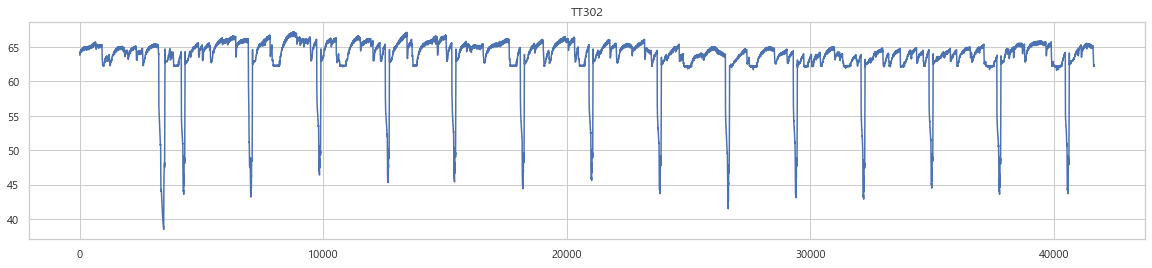

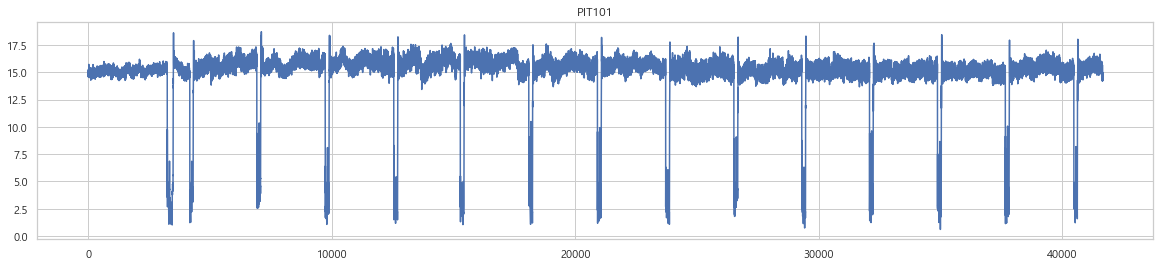

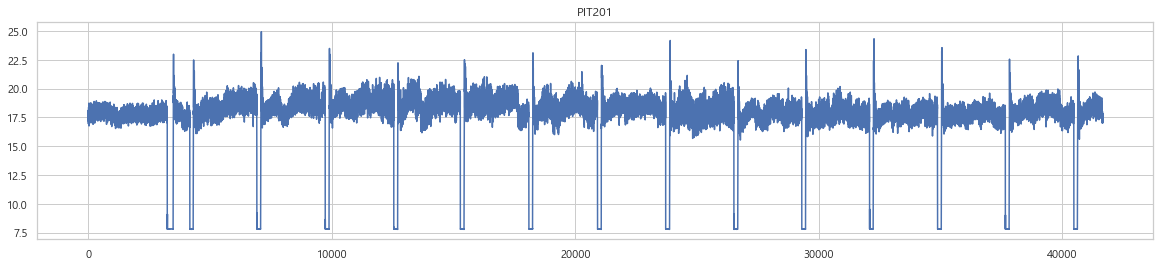

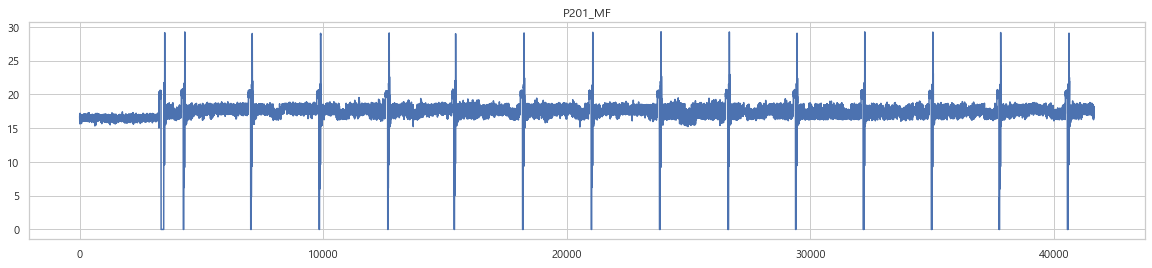

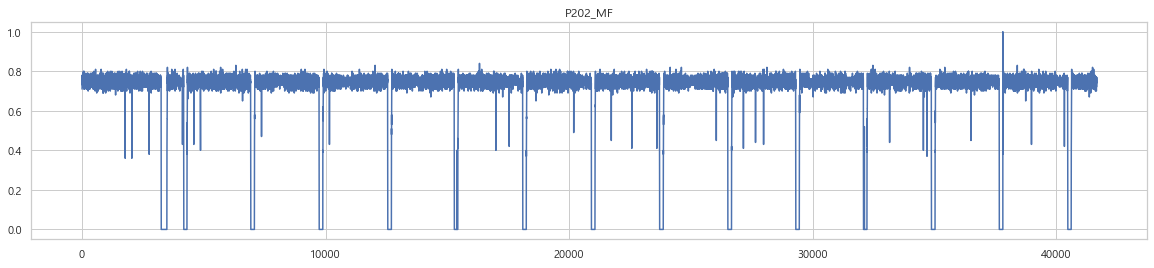

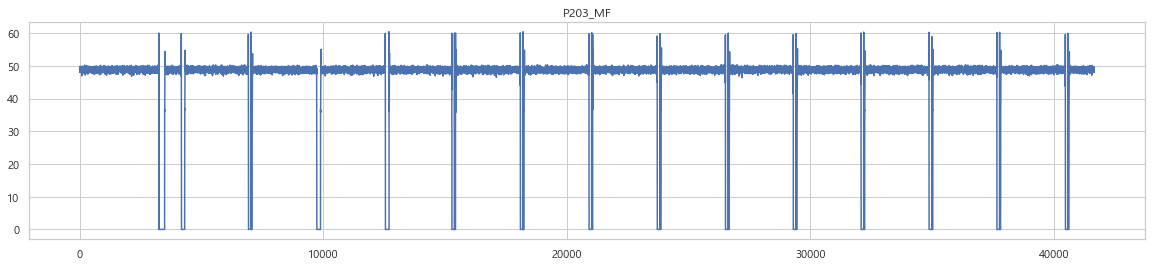

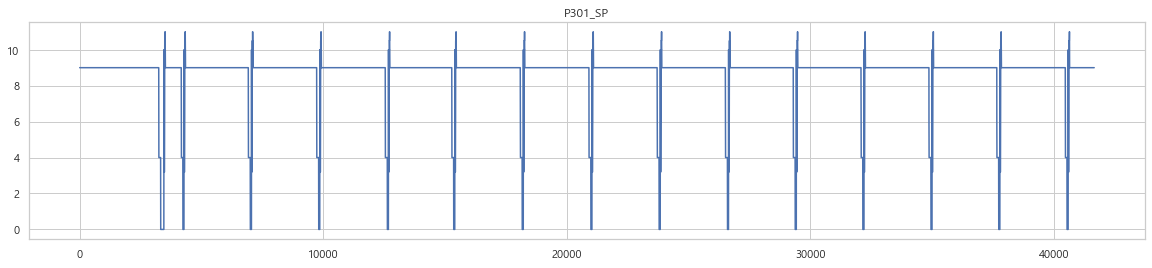

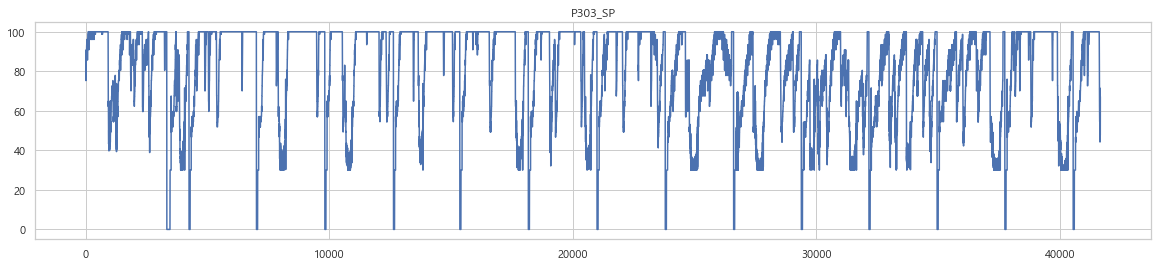

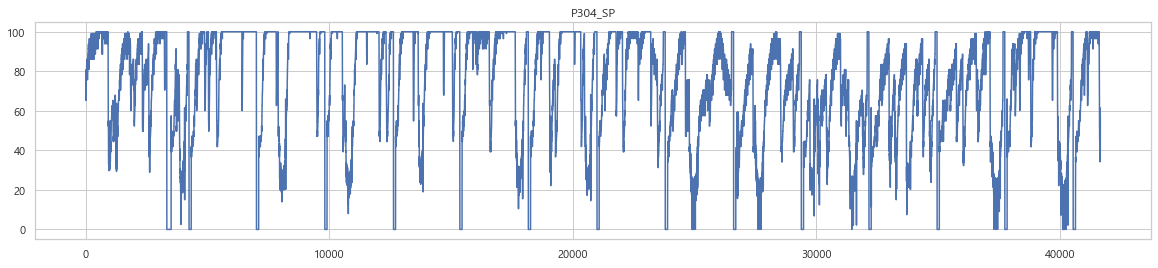

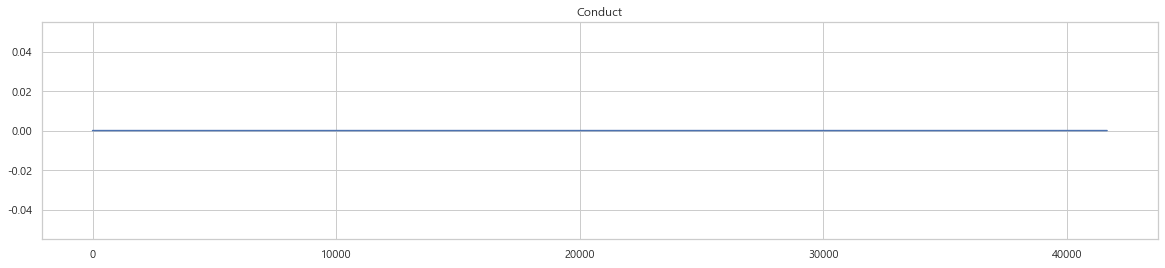

In [63]:
## 3. 그래프 한꺼번에 그리기 - matplotlib 

for i in var_list_2 : 
    plt.figure(figsize = (20,4))   ## 차트의 사이즈 지정 (옵션)
    plt.title('%s' %i)             ## 차트의 타이틀 지정 (옵션)
    df[i].plot()
    plt.savefig('img/%s.png' %i)   ## 차트를 이미지파일로 저장 (옵션)

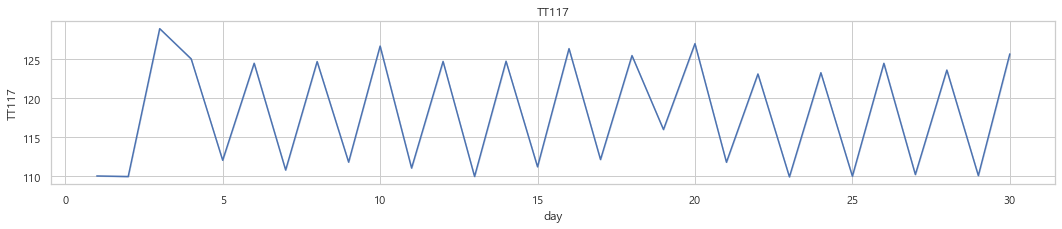

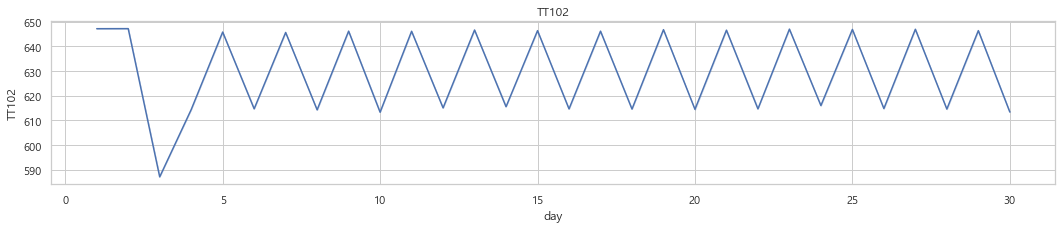

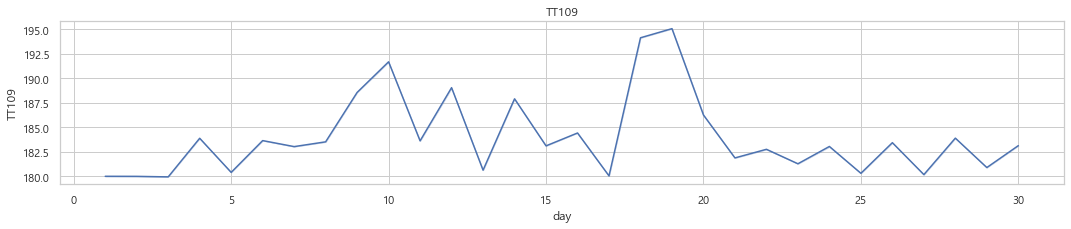

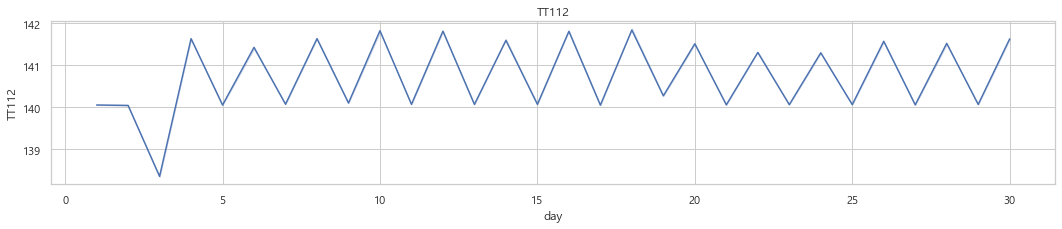

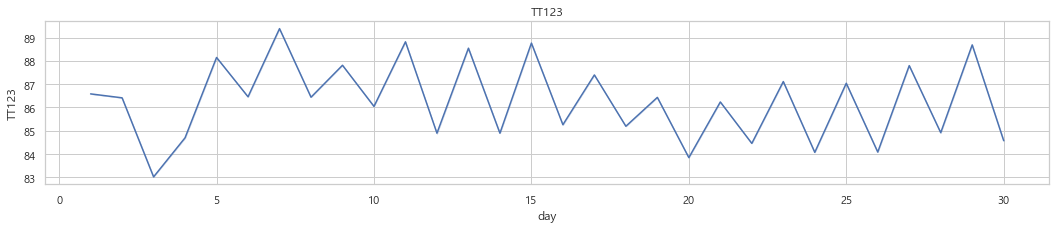

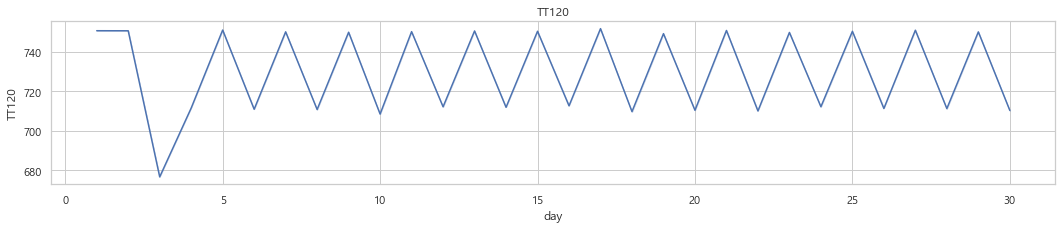

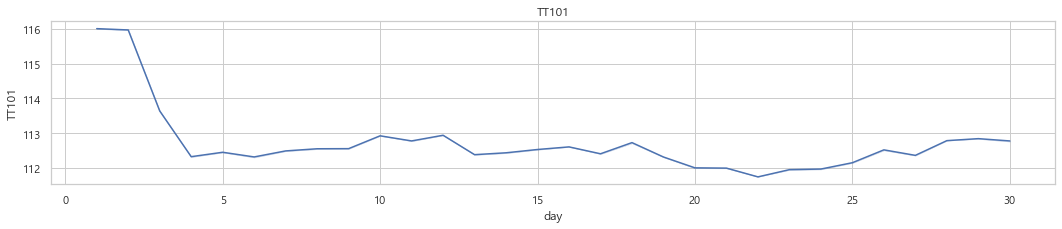

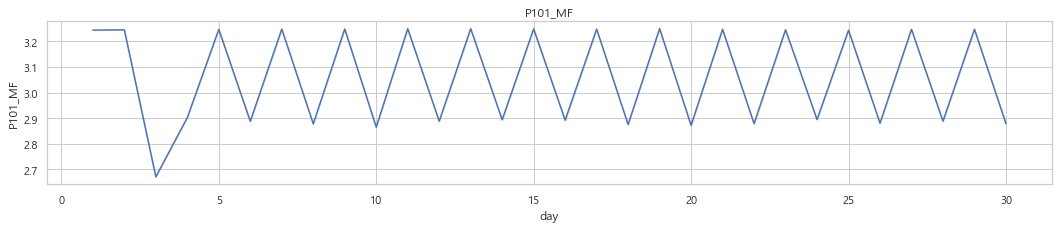

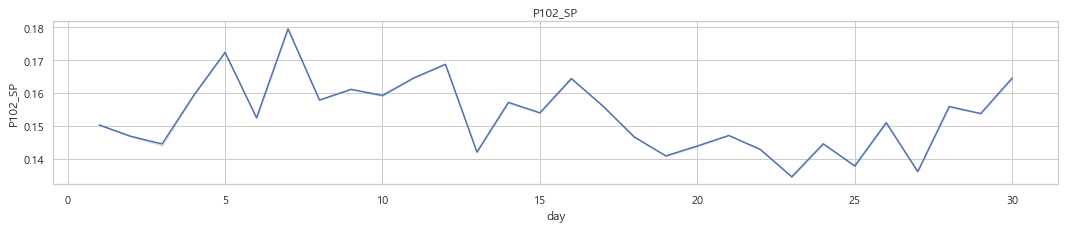

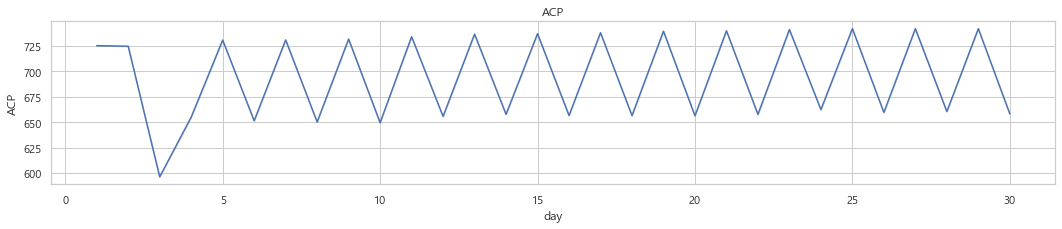

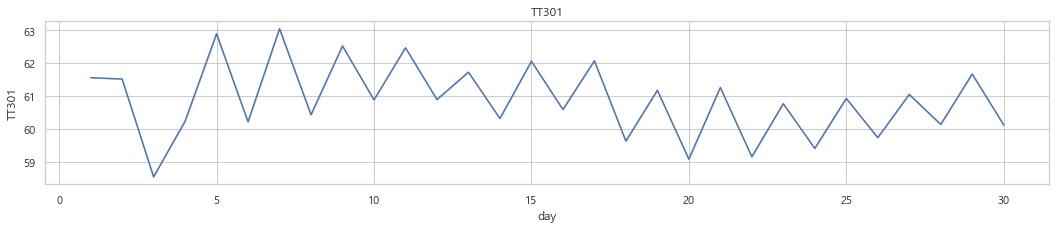

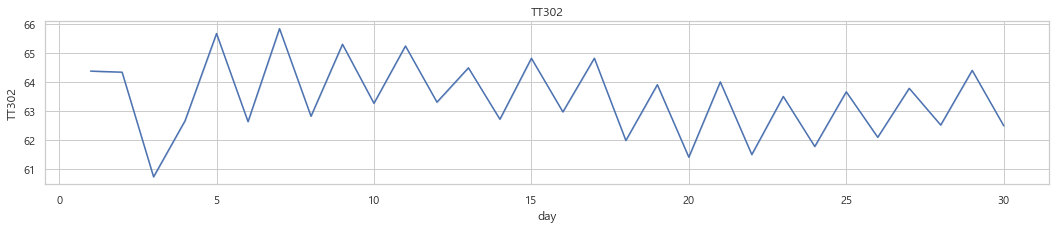

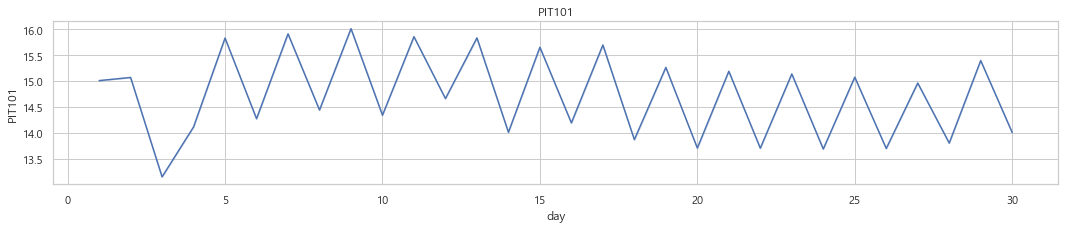

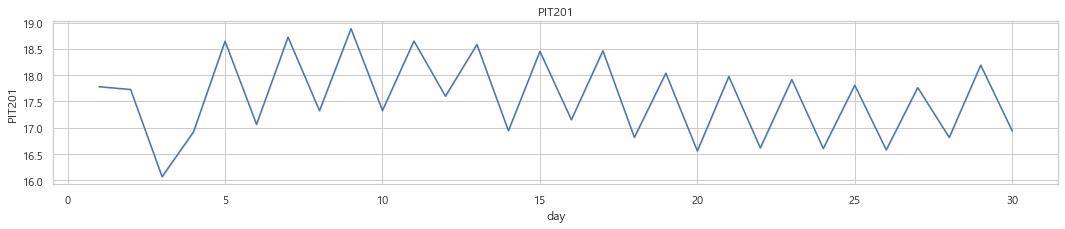

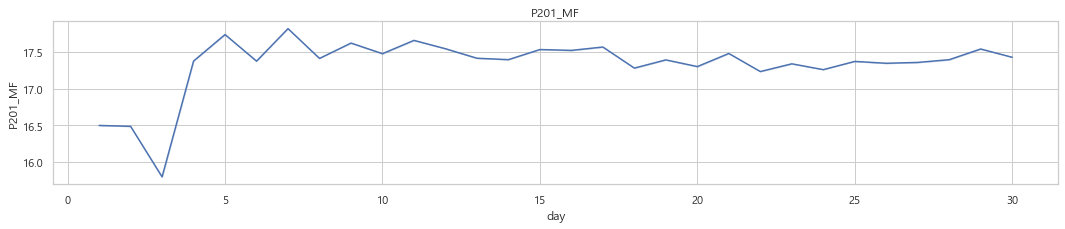

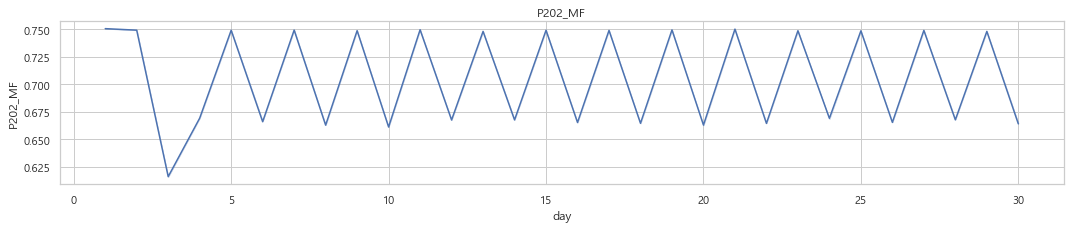

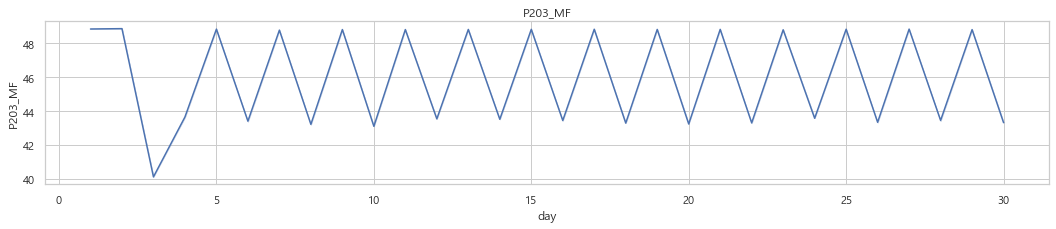

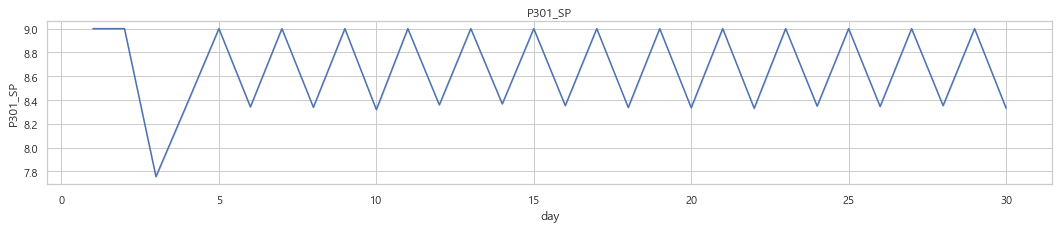

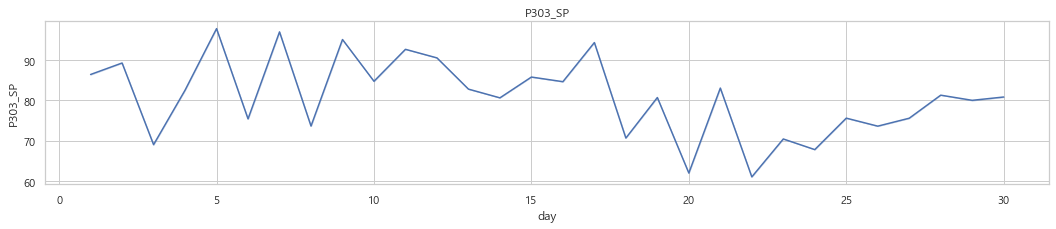

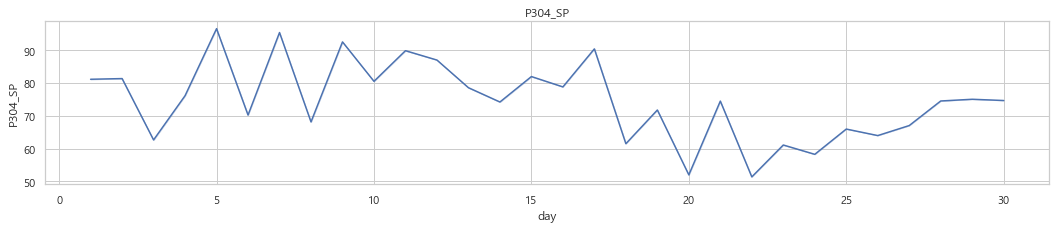

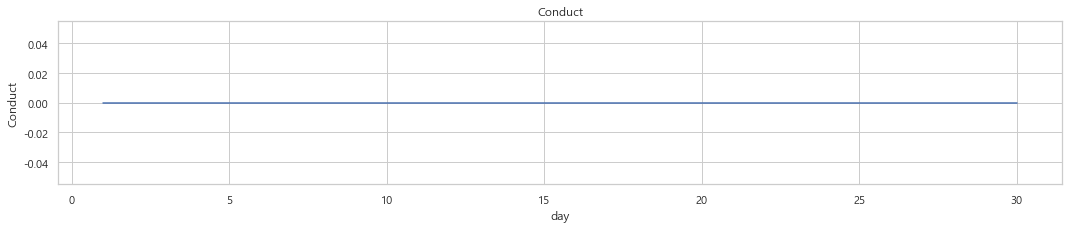

In [64]:
## 4. 그래프 한꺼번에 그리기 - seaborn

for i in var_list_2 : 
    plt.figure(figsize = (18,3))   ## 차트의 사이즈 지정 (옵션)
    plt.title('%s' %i)             ## 차트의 타이틀 지정 (옵션)
    sns.lineplot(data = df, x = 'day', y= i, ci = 0)
    plt.savefig('img/%s.png' %i)   ## 차트를 이미지파일로 저장 (옵션)